## Imports

In [1]:
from shtmbss2.common.config import *
from shtmbss2.nest.network import SHTMTotal
from shtmbss2.common.executor import ParallelExecutor
from shtmbss2.core.performance import PerformanceMulti
from shtmbss2.core.parameters import Parameters


              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: 3.6.0-post0.dev0
 Built: Nov  2 2023 17:34:19

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.


Dec 07 16:42:33 Install [Info]: 
    loaded module PyNN extensions for NEST


## Config

In [2]:
num_instances = 5
experiment_id = 'test'
experiment_num = 11

## Simulation

In [3]:
pe = ParallelExecutor(num_instances=num_instances, experiment_id='test')

experiment_num = pe.run()

Running emulation step 1/100
Running emulation step 1/100
Running emulation step 1/100
Running emulation step 1/100
Running emulation step 1/100
Computing performance for 2 Sequences.
Starting plasticity calculations
Computing performance for 2 Sequences.
Starting plasticity calculations
Computing performance for 2 Sequences.
Computing performance for 2 Sequences.
Starting plasticity calculations
Starting plasticity calculations
Computing performance for 2 Sequences.
Starting plasticity calculations
Running emulation step 2/100
Running emulation step 2/100
Running emulation step 2/100
Running emulation step 2/100
Running emulation step 2/100
Computing performance for 2 Sequences.
Starting plasticity calculations
Computing performance for 2 Sequences.
Starting plasticity calculations
Computing performance for 2 Sequences.
Starting plasticity calculations
Computing performance for 2 Sequences.
Starting plasticity calculations
Computing performance for 2 Sequences.
Starting plasticity cal

## Evaluation

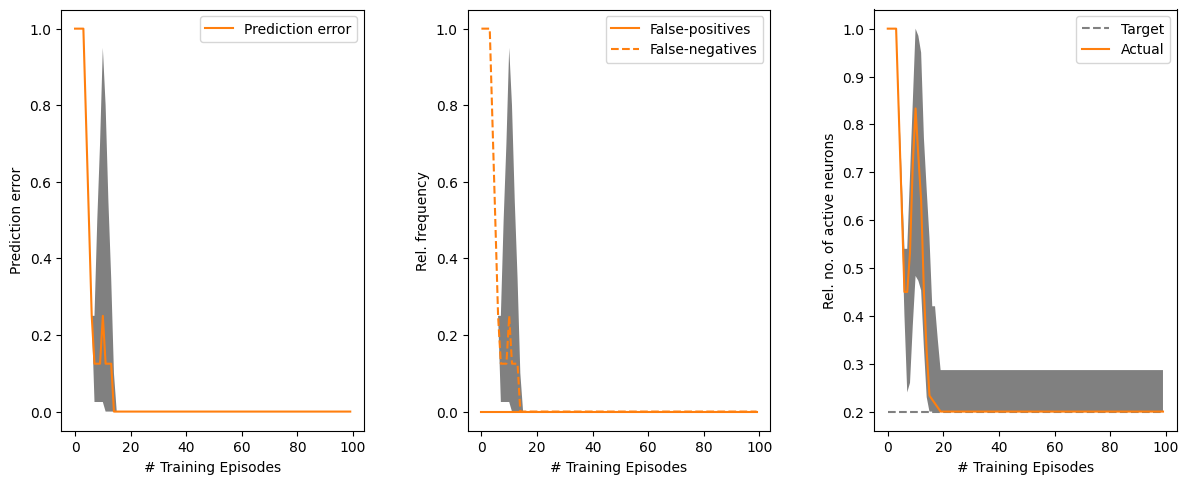

In [6]:
p = Parameters(network_type=SHTMTotal)
p.load_experiment_params(experiment_type=ExperimentType.EVAL_MULTI, experiment_id='test', experiment_num=experiment_num)

pf = PerformanceMulti(p, num_instances)
pf.load_data(SHTMTotal, experiment_type=ExperimentType.EVAL_MULTI, experiment_id="test", experiment_num=experiment_num)

axs, fig = pf.plot(statistic=StatisticalMetrics.MEDIAN)